In [4]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows=50
pd.options.display.max_columns=10

from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from sklearn.metrics import r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.datasets import make_multilabel_classification

In [6]:
df=pd.read_excel(r'C:\Users\Lenovo\Downloads\tsf (2).xlsx')

In [7]:
df

,date of week start,season type,distributers,fixed pay,cost of raw materails,other expenditure,cash out,net profit margin,cash in
0,2010-01-04,0,14,540000,537000,375000,1452000,0.49,2163480
1,2010-01-11,1,18,900000,604800,520800,2025600,0.66,3362496
2,2010-01-18,1,16,1020000,505200,597600,2122800,0.53,3247884
3,2010-01-25,2,32,1275000,696800,1072500,3044300,0.85,5631955
4,2010-02-01,2,29,1325000,592800,1138500,3056300,0.80,5501340
...,...,...,...,...,...,...,...,...,...
566,2020-11-09,1,19,840000,504000,594000,1938000,0.59,3081420
567,2020-11-16,0,16,525000,546000,383000,1454000,0.44,2093760
568,2020-11-23,0,10,600000,531000,360000,1491000,0.44,2147040
569,2020-11-30,1,20,1000000,595200,520800,2116000,0.72,3639520


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date of week start     571 non-null    datetime64[ns]
 1   season type            571 non-null    int64         
 2   distributers           571 non-null    int64         
 3   fixed pay              571 non-null    int64         
 4   cost of raw materails  571 non-null    int64         
 5   other expenditure      571 non-null    int64         
 6   cash out               571 non-null    int64         
 7   net profit margin      571 non-null    float64       
 8   cash in                571 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 40.3 KB


In [11]:
df['date of week start'].min()

Timestamp('2010-01-04 00:00:00')

In [12]:
df['date of week start'].max()

Timestamp('2020-12-07 00:00:00')

In [13]:
df['date of week start'].max()-df['date of week start'].min()

Timedelta('3990 days 00:00:00')

In [14]:
df['season type'].unique()

array([0, 1, 2], dtype=int64)

In [14]:
dt=df[['date of week start','cash in']]
df.set_index('date of week start',inplace=True)
dt

,date of week start,cash in
0,2010-01-04,2163480
1,2010-01-11,3362496
2,2010-01-18,3247884
3,2010-01-25,5631955
4,2010-02-01,5501340
...,...,...
566,2020-11-09,3081420
567,2020-11-16,2093760
568,2020-11-23,2147040
569,2020-11-30,3639520


In [15]:
df.head()

,date of week start,season type,distributers,fixed pay,cost of raw materails,other expenditure,cash out,net profit margin,cash in
0,2010-01-04,0,14,540000,537000,375000,1452000,0.49,2163480
1,2010-01-11,1,18,900000,604800,520800,2025600,0.66,3362496
2,2010-01-18,1,16,1020000,505200,597600,2122800,0.53,3247884
3,2010-01-25,2,32,1275000,696800,1072500,3044300,0.85,5631955
4,2010-02-01,2,29,1325000,592800,1138500,3056300,0.80,5501340


In [18]:
df.groupby('date of week start').size().reset_index().rename(columns={0: 'df'})

,date of week start,df
0,2010-01-04,1
1,2010-01-11,1
2,2010-01-18,1
3,2010-01-25,1
4,2010-02-01,1
...,...,...
566,2020-11-09,1
567,2020-11-16,1
568,2020-11-23,1
569,2020-11-30,1


In [23]:
X=df['cash in']

In [24]:
test=X.iloc[-30:]

In [25]:
train=X.iloc[:-30]

In [27]:
train

date of week start
2010-01-04    2163480
2010-01-11    3362496
2010-01-18    3247884
2010-01-25    5631955
2010-02-01    5501340
               ...   
2020-04-13    2349870
2020-04-20    3417948
2020-04-27    3389416
2020-05-04    5947760
2020-05-11    5856653
Name: cash in, Length: 541, dtype: int64

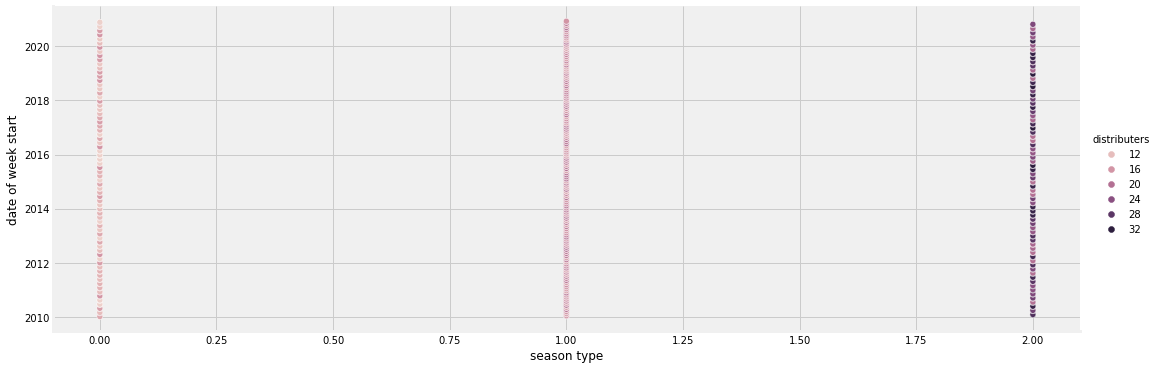

In [19]:
sns.relplot(x="season type",y="date of week start",hue="distributers",data=df,height=5,aspect=3)

In [20]:
df['cost of raw materails'].min()

492000

In [21]:
df['cost of raw materails'].max()

798400

In [5]:
df= df.groupby(["date of week start"])['cash in'].sum().reset_index()
df

,date of week start,cash in
0,2010-01-04,2163480
1,2010-01-11,3362496
2,2010-01-18,3247884
3,2010-01-25,5631955
4,2010-02-01,5501340
...,...,...
566,2020-11-09,3081420
567,2020-11-16,2093760
568,2020-11-23,2147040
569,2020-11-30,3639520


In [23]:
df=df[["date of week start"]]

In [24]:
#checking for stationarity
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(df):
    result=adfuller(df)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adfuller_test(df)

ADF Test Statistic : -2.5269343974636196
p-value : 0.1090576650281489
#Lags Used : 15
Number of Observations Used : 555
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


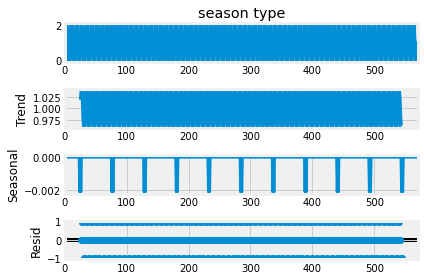

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
final = seasonal_decompose(df['season type'],model='additive', freq = 52) # annual=1,Quaterly=4,monthly=12,weekly=52
final.plot();

In [29]:
# KPSS test fixed here

In [28]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df)

KPSS Statistic: 2.958344366950491
p-value: 0.01
num lags: 19
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


<AxesSubplot:>

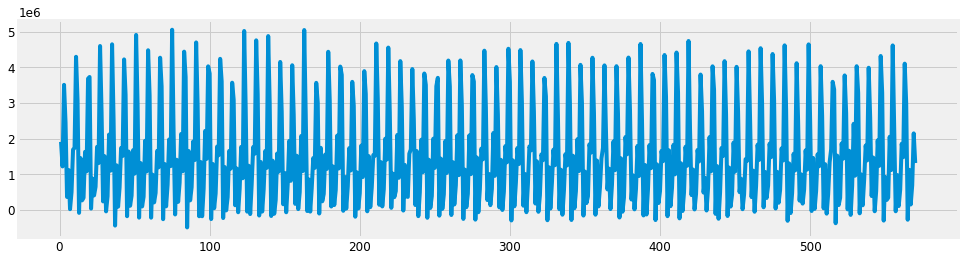

In [30]:
#checking for differences
df['total_cash'] = df['cash in'] - df['cash out'].shift(1)
df['total_cash'].dropna().plot()

In [8]:
df['total_cash'] = df['cash in'] - df['cash out']
df.head()

,date of week start,season type,distributers,fixed pay,cost of raw materails,other expenditure,cash out,net profit margin,cash in,total_cash
0,2010-01-04,0,14,540000,537000,375000,1452000,0.49,2163480,711480
1,2010-01-11,1,18,900000,604800,520800,2025600,0.66,3362496,1336896
2,2010-01-18,1,16,1020000,505200,597600,2122800,0.53,3247884,1125084
3,2010-01-25,2,32,1275000,696800,1072500,3044300,0.85,5631955,2587655
4,2010-02-01,2,29,1325000,592800,1138500,3056300,0.80,5501340,2445040


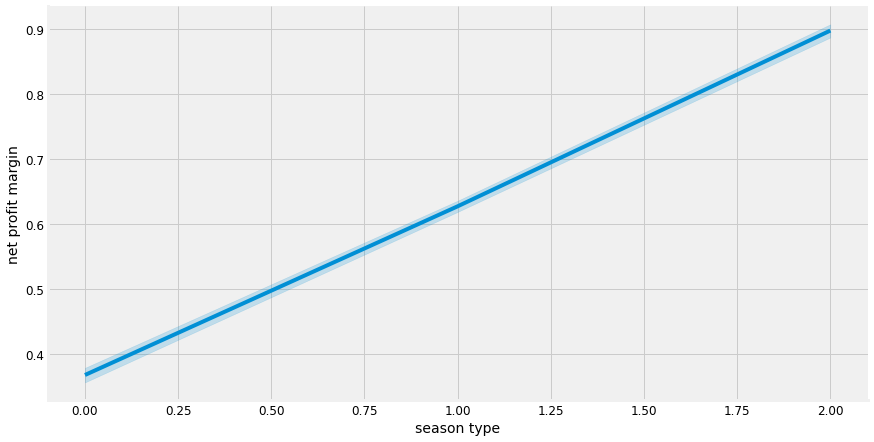

In [13]:
sns.relplot(x = 'season type', y='net profit margin',data = df,kind = 'line',height=6,aspect=2)

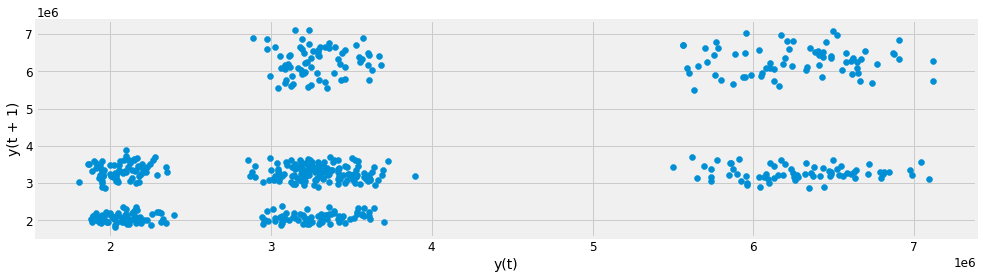

In [14]:
from pandas.plotting import lag_plot
lag_plot(df["cash in"])
plt.show()

In [49]:
#filtering out validation sample(to use train test)
print(df.shape)
train_size = int(len(df) * 0.80)
train, test = df[0:train_size],df[train_size:]
print(train.shape,test.shape)

(571, 12)
(456, 12) (115, 12)


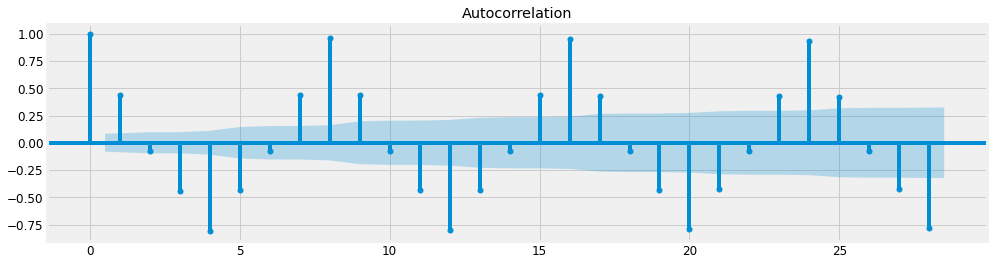

In [15]:
#performing ACF&PACF plots to find which model to use??
#ACF PLOT
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["cash in"])
plt.show()

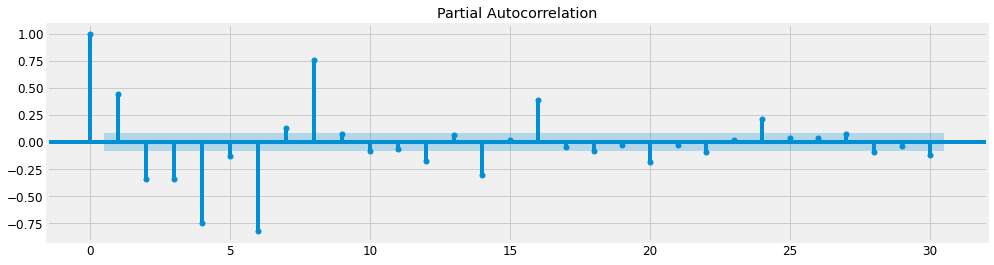

In [16]:
#PACF PLOT
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["cash in"], lags=30)
plt.show()

In [17]:
#Acc.. TO ACF=AR model.
#acc.. tp PACF=MA(2) model.
#so need to use ARMA model.
#define the model

In [35]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['cash in'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=17858.213, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=17913.211, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17791.150, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=17673.405, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18996.038, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=17711.184, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=17669.080, Time=0.35 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=17663.173, Time=0.63 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=17552.405, Time=0.62 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=17595.741, Time=0.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=17378.132, Time=1.75 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.17 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=17554.074, Time=1.14 sec
 ARIMA(3,0,2)(0,0,0)[0] interce

In [36]:
#arima
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['cash in'],order=(5,0,5)) 
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                cash in   No. Observations:                  571
Model:                     ARMA(5, 5)   Log Likelihood               -8274.086
Method:                       css-mle   S.D. of innovations         468755.714
Date:                Tue, 15 Jun 2021   AIC                          16572.171
Time:                        12:19:40   BIC                          16624.340
Sample:                             0   HQIC                         16592.524
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.731e+06   9845.123    379.013      0.000    3.71e+06    3.75e+06
ar.L1.cash in     0.2209      0.002    109.081      0.000       0.217       0.225
ar.L2.cash in    -0.0088      0.003     -2.991      0.003      -0.015      -0.003
ar.L3.cash in    -0.0356      0.002    -17.531      0.000      -0.040      -0.032
ar.L4.cash in    -0.9409   7.71e-06  -1.22e+05      0.000      -0.941      -0.941
ar.L5.cash in     0.1730      0.000   1203.481      0.000       0.173       0.173
ma.L1.cash in    -0.4557      0.032    -14.150      0.000      -0.519      -0.393
ma.L2.cash in    -0.4122      0.031    -13.196      0.000      -0.473      -0.351
ma.L3.cash in     0.4845      0.034     14.067      0.000       0.417       0.552
ma.L4.cash in     0.7035      0.029     24.384      0.000       0.647       0.760
ma.L5.cash in    -0.5248      0.028    -18.760      0.000      -0.580      -0.470
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7261           -0.7268j            1.0273           -0.3749
AR.2           -0.7261           +0.7268j            1.0273            0.3749
AR.3            0.7071           -0.7071j            1.0000           -0.1250
AR.4            0.7071           +0.7071j            1.0000            0.1250
AR.5            5.4758           -0.0000j            5.4758           -0.0000
MA.1           -0.8792           -0.5969j            1.0626           -0.4051
MA.2           -0.8792           +0.5969j            1.0626            0.4051
MA.3            0.7143           -0.7072j            1.0052           -0.1242
MA.4            0.7143           +0.7072j            1.0052            0.1242
MA.5            1.6700           -0.0000j            1.6700           -0.0000
-----------------------------------------------------------------------------
"""

In [37]:
model.predict()

0      3.731430e+06
1      3.288845e+06
2      3.864230e+06
3      3.955722e+06
4      5.343362e+06
           ...     
566    3.820311e+06
567    2.096870e+06
568    1.861145e+06
569    3.451921e+06
570    3.845427e+06
Length: 571, dtype: float64

In [38]:
index_future_dates=pd.date_range(start='2020-05-15',end='2020-05-31')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+16).rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-05-15    3.380752e+06
2020-05-16    3.731430e+06
2020-05-17    3.731430e+06
2020-05-18    3.731430e+06
2020-05-19    3.731430e+06
2020-05-20    3.731430e+06
2020-05-21    3.731430e+06
2020-05-22    3.731430e+06
2020-05-23    3.731430e+06
2020-05-24    3.731430e+06
2020-05-25    3.731430e+06
2020-05-26    3.731430e+06
2020-05-27    3.731430e+06
2020-05-28    3.731430e+06
2020-05-29    3.731430e+06
2020-05-30    3.731430e+06
2020-05-31    3.731430e+06
Freq: D, Name: ARIMA Predictions, dtype: float64


In [29]:
#forecast with seasonality
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(df['cash in'], start_p = 1, d=1, start_q = 1, max_p = 5, max_q = 5, max_d=5, m = 12, 
start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,seasonal = True, trace = True, error_action ='ignore',   
suppress_warnings = True,  stepwise = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=18242.932, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=1.02 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=16340.582, Time=0.77 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.27 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=4.68 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=17767.538, Time=1.34 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=1.60 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=9.85 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=17704.650, Time=1.64 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=17705.258, Time=1.47 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=17707.112, Time=

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1=SARIMAX(df['cash in'],order=(0,1,0),seasonal_order=(1,1,1,12))
results=model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              cash in   No. Observations:                  571
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -8167.291
Date:                              Tue, 15 Jun 2021   AIC                          16340.582
Time:                                      12:20:17   BIC                          16353.555
Sample:                                           0   HQIC                         16345.648
                                              - 571                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.9601      0.011    -90.210      0.000      -0.981      -0.939
ma.S.L12      -0.7157      0.023    -31.692      0.000      -0.760      -0.671
sigma2       2.32e+11   2.69e-14   8.62e+24      0.000    2.32e+11    2.32e+11
===================================================================================
Ljung-Box (L1) (Q):                  53.01   Jarque-Bera (JB):               127.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+40. Standard errors may be unstable.
"""

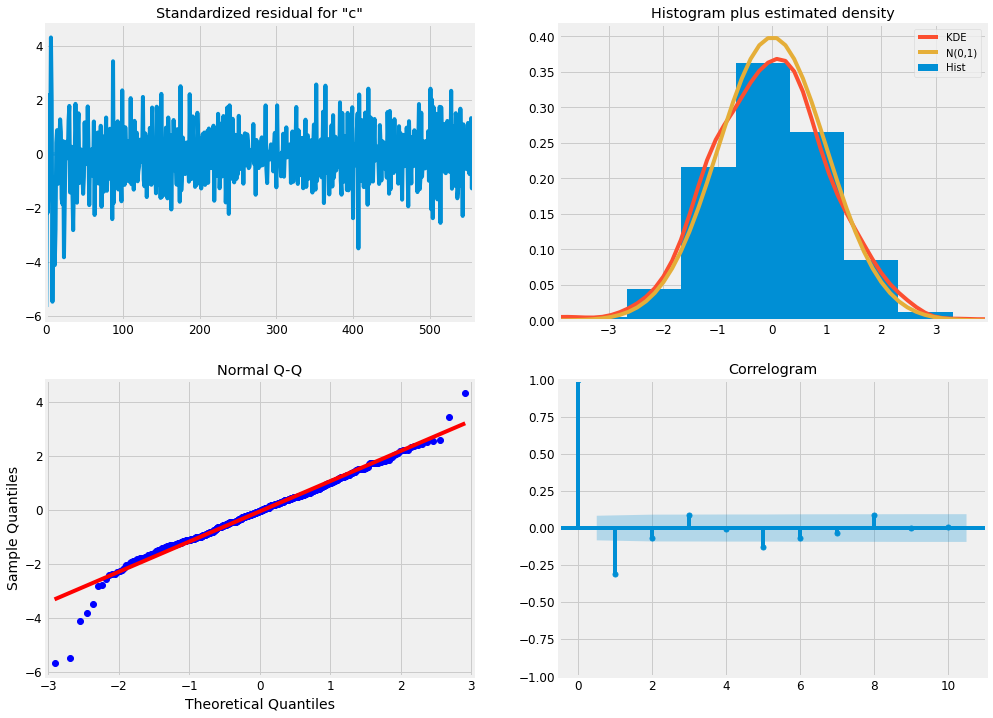

In [40]:
results.plot_diagnostics(figsize=(15, 12)) 
plt.show()

In [19]:
##simple exponential smoothing 
#doubt
#from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
#from sklearn.metrics import mean_squared_error
#from math import sqrt
#def timeseries_evaluation_metrics_func(y_true, y_pred):
     #def mean_absolute_percentage_error(y_true, y_pred): 
        #y_true, y_pred = np.array(y_true), np.array(y_pred)
        #return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#print('Evaluation metric results:-')
#print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
#print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
#print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
#print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
#print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [31]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

In [39]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

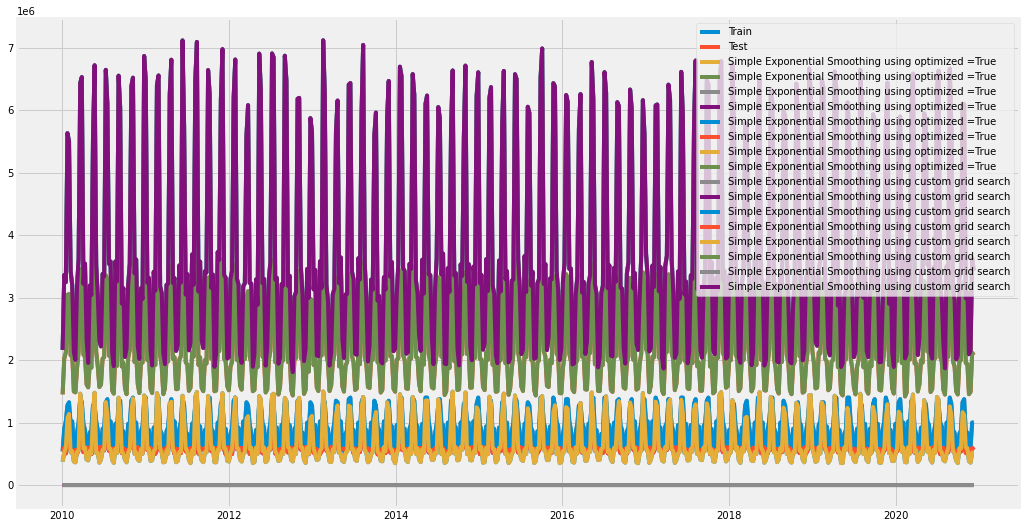

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

In [42]:
#double automated smoothing
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [43]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [44]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

In [45]:
Forecast_custom_pred = fit1.forecast(30)

In [46]:
fit1.summary()

Dep. Variable:,cash in,No. Observations:,541
Model:,Holt,SSE,2195187909050650.750
Optimized:,False,AIC,15714.109
Trend:,Additive,BIC,15731.283
Seasonal:,None,AICC,15714.266
Seasonal Periods:,None,Date:,"Tue, 15 Jun 2021"
Box-Cox:,False,Time:,23:22:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [47]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 247859144770652.47
MAE is : 14209605.91197043
RMSE is : 15743542.954832386
MAPE is : 476.2616292889733
R2 is : -114.78829595528788



In [48]:
#automated parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)

In [49]:
fitESAUTO.summary()

Dep. Variable:,cash in,No. Observations:,541
Model:,Holt,SSE,1544747090380397.500
Optimized:,True,AIC,15523.998
Trend:,Additive,BIC,15541.171
Seasonal:,None,AICC,15524.155
Seasonal Periods:,None,Date:,"Tue, 15 Jun 2021"
Box-Cox:,False,Time:,23:24:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9714286,alpha,True
smoothing_trend,0.0231293,beta,True


In [51]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 11816548442219.826
MAE is : 3112033.7045421
RMSE is : 3437520.6824424816
MAPE is : 115.44696949158035
R2 is : -4.520143343767995



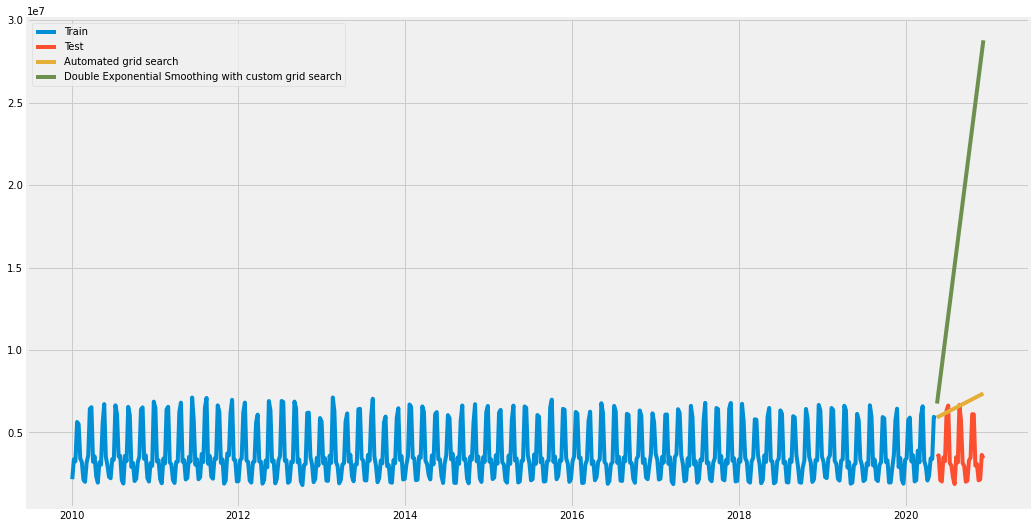

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

In [53]:
##LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel('C:\Users\Lenovo\Desktop\bepec forecasting excel file.xlsx')

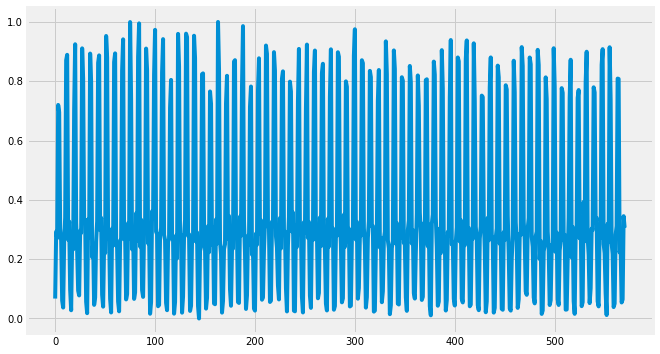

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=df['cash in'].copy()
df5=scaler.fit_transform(np.array(df4).reshape(-1,1))
plt.plot(df5)

In [68]:
print(df5.shape)
train_size = int(len(df5) * 0.80)
train, test = df5[0:train_size],df5[train_size:]
print(train.shape,test.shape)

(571, 1)
(456, 1) (115, 1)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping


In [11]:
import numpy as np
dataset = df['cash in'].values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [32]:
model = Sequential()
model.add(Bidirectional(LSTM(120, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.4))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=15, batch_size=25, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/15
17/17 [==============================] - 15s 303ms/step - loss: 0.1614 - val_loss: 0.0512
Epoch 2/15
17/17 [==============================] - 0s 7ms/step - loss: 0.0481 - val_loss: 0.0177
Epoch 3/15
17/17 [==============================] - 0s 7ms/step - loss: 0.0241 - val_loss: 0.0111
Epoch 4/15
17/17 [==============================] - 0s 7ms/step - loss: 0.0154 - val_loss: 0.0061
Epoch 5/15
17/17 [==============================] - 0s 7ms/step - loss: 0.0102 - val_loss: 0.0038
Epoch 6/15
17/17 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0028
Epoch 7/15
17/17 [==============================] - 0s 7ms/step - loss: 0.0066 - val_loss: 0.0028
Epoch 8/15
17/17 [==============================] - 0s 7ms/step - loss: 0.0064 - val_loss: 0.0027
Epoch 9/15
17/17 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.0026
Epoch 10/15
17/17 [==============================] - 0s 8ms/step - loss: 0.0058 - val_loss: 0.0026
Epoch 11/15
17/1

In [11]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 198125.788167451
Train Root Mean Squared Error: 264704.8971886355
Test Mean Absolute Error: 199713.70550732786
Test Root Mean Squared Error: 265975.46738768776


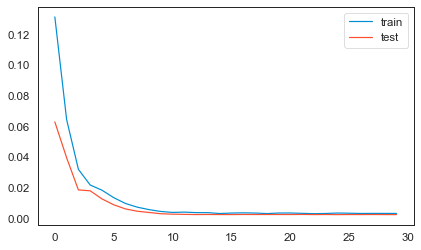

In [86]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

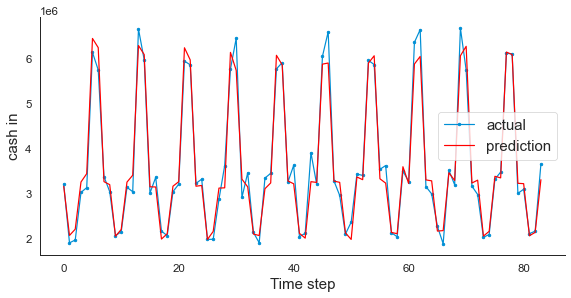

In [87]:
aa=[x for x in range(84)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('cash in', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [60]:
#arma
import pandas as pd
df = pd.read_excel(r'C:\Users\Lenovo\Downloads\tsf (4).xlsx', parse_dates=['cash in'], index_col='cash out')

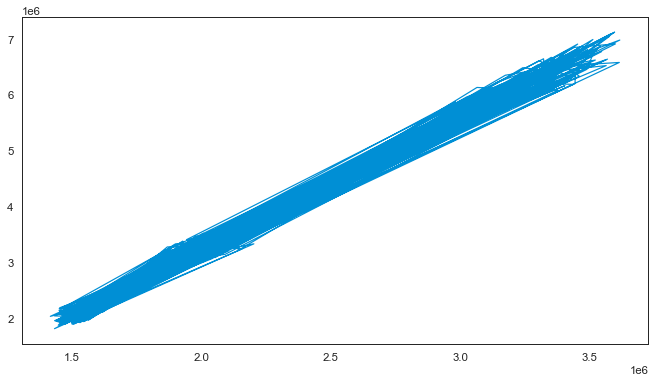

In [90]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(df['cash in'])

In [91]:
# fit model
from statsmodels.tsa.arima_model import ARMA
ARMAmodel = ARMA(df['cash in'], order=(1, 1))
ARmodel_fit = ARMAmodel.fit(disp=False)

In [92]:
# make prediction
ypredicted = ARmodel_fit.predict(len(df), len(df)+2)
print(ypredicted)

571   3382059.7350
572   3778162.2129
573   3725179.1228
dtype: float64
